คราวนี้เราจะมาลองสร้าง Dataset ของตัวเอง เพื่อเทรนโมเดล 

* Acne สิว 
* Melasma ฝ้า
* Freckle กระ

# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล



In [3]:
folder = 'acne'
file = 'urls_acne.txt'

In [7]:
folder = 'melasma'
file = 'urls_melasma.txt'

In [10]:
folder = 'freckle'
file = 'urls_freckle.txt'

Create folder and download all pictures in urls

In [11]:
path = Path('data/skin')
download_path = path/'downloads'
dest = download_path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
download_images(path/file, dest, max_pics=300)

Check for broken files

In [13]:
classes = ['melasma','freckle','acne']

In [14]:
for c in classes:
    print(c)
    verify_images(download_path/c, delete=True, max_size=720)

melasma


cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000015.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000219.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000212.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000105.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000197.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000242.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000254.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000294.jpg'>
cannot identify image file <_io.Buffered

cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000291.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000040.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000142.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000173.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000174.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000232.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000119.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000216.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000231.png'>
cannot identify image file <_io.Buffered

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000150.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000269.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000017.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000135.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000116.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000193.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000030.jpg'>
acne


/opt/anaconda3/lib/python3.7/site-packages/fastprogress/fastprogress.py:96: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


# 3. เตรียมข้อมูล

เพิ่มขนาดรูปจาก 224 เป็น 299 และลดขนาด batch size เหลือ 64 เนื่องจากโมเดลที่ขนาดใหญ่ขึ้น มีความต้องการ Memory ที่มากขึ้น ถ้าใช้ Batch Size เท่าเดิมจะทำให้ Error GPU Out of Memory ได้

In [15]:
batchsize = 64
np.random.seed(55)

databunch = ImageDataBunch.from_folder(download_path, train='.', 
                                       valid_pct=0.2, 
                                       ds_tfms=get_transforms(), 
                                       size=512, bs=batchsize).normalize(imagenet_stats)

## สำรวจข้อมูล ##

ลองดูข้อมูล Batch แรก ด้วย show_batch สั่งให้แสดง รูป พร้อม label ชื่อพันธุ์ไว้บนรูป แสดง 3 แถว (rows) ในกรอบขนาด 12 x 9 นิ้ว (figsize)

*เราสามารถรัน cell นี้หลายครั้ง เพื่อเรียกดู batch ต่อ ๆ ไป ได้เรื่อย ๆ เป็นการสำรวจข้อมูล*

In [16]:
databunch.classes

['freckle', 'melasma']

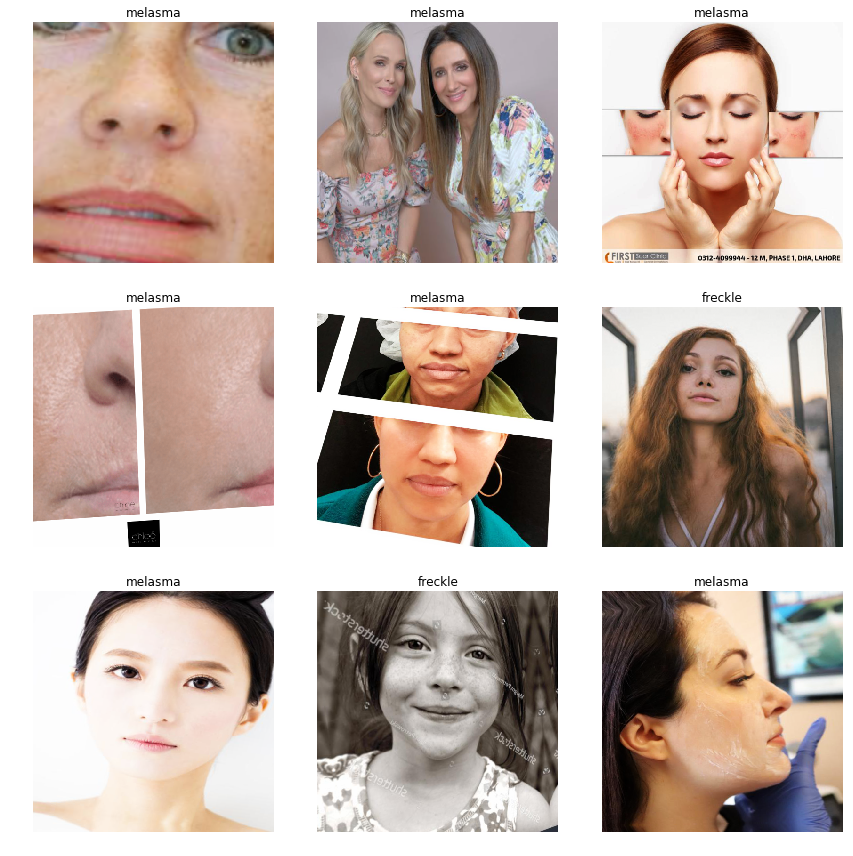

In [17]:
databunch.show_batch(rows=3, figsize=(12, 12))

In [18]:
databunch.classes, databunch.c, len(databunch.train_ds), len(databunch.valid_ds)

(['freckle', 'melasma'], 2, 427, 106)

# 4. สร้างโมเดล

เปลี่ยนจาก models.resnet34 เป็น models.resnet50

In [19]:
learner = cnn_learner(databunch, models.resnet34, metrics=accuracy)

# 5. เริ่มต้นเทรนโมเดล

เทรนด้วยค่า Default ไป 8 Cycle

In [20]:
learner.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.946182,0.681111,0.603774,00:13
1,0.793899,0.614316,0.660377,00:10
2,0.685675,0.437304,0.820755,00:10
3,0.599829,0.396605,0.820755,00:10
4,0.539040,0.392156,0.839623,00:11
5,0.486095,0.386242,0.839623,00:10
6,0.445837,0.382837,0.839623,00:10
7,0.414799,0.379050,0.839623,00:10


เรามา Save Model ที่เราเพิ่งเทรนไปเก็บไว้ก่อน

In [21]:
learner.save('01d-resnet50-1')

โหลดโมเดลที่เรา Save ไว้ ขึ้นมาใหม่ เตรียมเทรนในขึ้นตอนถัดไป (ที่คอมเม้นท์ไว้ เพราะถ้าไม่ได้เปลี่ยนอะไรก็จะได้ไม่ต้องรัน)

In [22]:
# learner.load('01d-resnet50-1')

# 6. เทรนต่อ

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


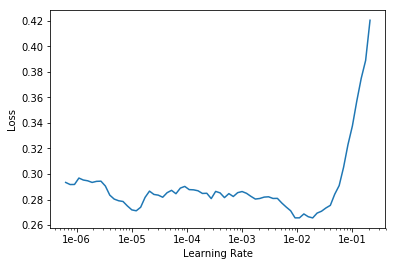

In [23]:
learner.lr_find()
learner.recorder.plot()

unfreeze layer ทุก Layer ให้สามารถเทรนได้ แล้วเทรนต่อทั้งโมเดล

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(6, max_lr=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.312647,0.384527,0.839623,00:13
1,0.281137,0.445947,0.820755,00:12
2,0.256846,0.451822,0.811321,00:11
3,0.241840,0.427219,0.858491,00:11
4,0.232591,0.409830,0.849057,00:11


## สำเร็จแล้ว ##

เพียงแค่เวลา 10 นาทีเศษ เราเทรน Model ได้ accuracy ประมาณ 0.95 หรือ ความแม่นยำประมาณ 95%

เปรียบเทียบกับ 94.0% จาก ResNet34 ที่เราเทรนครั้งก่อน 

เรามา Save Model ที่เราเพิ่งเทรนไปเก็บไว้ก่อน

In [ ]:
learner.save('01d-resnet50-2')

In [ ]:
# learner.load('01d-resnet50-2')

# 7. ดูผลลัพธ์

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learner)

In [ ]:
interpretation.plot_top_losses(9, figsize=(10,10))

In [ ]:
interpretation.plot_confusion_matrix(figsize=(10,10), dpi=72)

เรียกดู most_confused คือ พันธุ์ที่โมเดลทายผิดมากที่สุดเรียงลงไป

In [ ]:
interpretation.most_confused(min_val=2)

Clean ข้อมูล

In [ ]:
from fastai.widgets import *

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs, path)

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learner, ds_type=DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

# 8. สรุป


เปรียบเทียบกับเคสก่อนที่ใช้ ResNet34 กับ เคสนี้เราใช้ ResNet50 

* โมเดลใช้เวลาในการเทรนนานขึ้น จาก 3 นาที เป็น 10 นาที
* ใช้ memory GPU มากขึ้น 
* ประสิทธิภาพความแม่นยำดีขึ้น ประมาณ 1%

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 2](https://course.fast.ai/videos/?lesson=2)